# 다이나믹 프로그래밍
## 정리
- 큰 문제를 작게 나누고, 같은 문제라면 한번씩만 풍어 문제를 효율적으로 해결하는 알고리즘
- 코딩 테스트에서는 간단한 형태로 출제
- Bottom-up 방식을 권장
- 피보나치 수열로 개념을 잡자

#### 조건
    1. 작은문제로 나눌 수 있다.
    2. 작은 문제에서 구한 답은 작은 문제를 포함하는 큰 문제에서도 동일하다.

#### Top-Down
- 메모이제이션(Memoization) 기법 // 캐싱(caching)
    - 한번 구한 결과를 메모리 공간에 저장해 두고 같은식을 호출하면 저장된 결과를 그대로 가져오는 기법
    - Top-Down 에 국한되 사용되는 표현
    - dict를 이용할 수 있음

#### Bottom-Up
- DP테이블 (Bottom-Up 에서 사용하는 결과 저장용 리스트)




In [14]:
# 피보나치 수열1
# 재귀함수
def fivo(n):
    print(f'fivo({n})',end = ' ')
    if n == 1 or n == 2:
        return 1
    
    return fivo(n-1) + fivo(n-2)
print(fivo(6))


fivo(6) fivo(5) fivo(4) fivo(3) fivo(2) fivo(1) fivo(2) fivo(3) fivo(2) fivo(1) fivo(4) fivo(3) fivo(2) fivo(1) fivo(2) 8


In [15]:
# 피보나치 수열2
# 메모이제이션
memo = [0]*100 # 메모이제이션을 위한 리스트
def fivo(n):
    print(f'fivo{n}',end = ' ')
    if n == 1 or n == 2:
        return 1
    # 계산한적이 있으면 그 값 내보내고 아니면 계산
    if memo[n] != 0:
        return memo[n]
    else:
        memo[n] = fivo(n-1) + fivo(n-2)
    #결국 최종에는 메모이제이션 값으로      
    return memo[n]
print(fivo(6))


fivo6 fivo5 fivo4 fivo3 fivo2 fivo1 fivo2 fivo3 fivo4 8


In [34]:
# 피보나치 수열3
# bottom-up (for문)

memo = [0]*100 # bottom-up 에서는 "DP테이블"로 불림
 
memo[0] = 1
memo[1] = 1

n = 100
for i in range(2,n):
    memo[i] = memo[i-1]+memo[i-2]

print(memo[n-1])

354224848179261915075


## 1로 만들기
- 다이나믹 프로그래밍의 대표문제  

__점화식__  
$a_i = min(a_{i-1},  a_{i/2},  a_{i/3},  a_{i/5}) + 1 $ : 이전 단계 연산들 중 가장 작은 것에 연산 1회 더해준 것

In [31]:
# 내답
# 못품
n = int(input())
cnt = 0


 26


13.0
12.0
4.0
2.0
1.0
5


In [45]:
# 책답
# 점화식 = min(a_i-1, a_i/2, a_i/3, a_i/5) + 1  // 1을 더해주는 이유 : 함수의 호출횟수를 구하기 위해
# 점화식을 토대로 bottom-up DP

n = int(input())

dp_table = [0]*30001 # 30000까지의 범위니까 0~29999 + 1 = 1~30000

for i in range(2,n+1): # 0은 제외 ,1은 0번 실행, 2는 2로나누니까 1회 실행이니까 2부터
    # 현재수에서 1을 뺴는 경우
    dp_table[i] = dp_table[i-1] + 1   # dp_table[i-1] + 1: dp_table[i-1] 에서 연산 1회 더 실행
    
    # 현재수에서 2로 나누는 경우
    if i % 2 == 0:
        dp_table[i] = min(dp_table[i],dp_table[i//2] + 1) # dp_table[i//2] + 1 : dp_table[i//2] 에서 연산 1회 더 실행
    # 현재수에서 3로 나누는 경우
    if i % 3 == 0:
        dp_table[i] = min(dp_table[i],dp_table[i//3] + 1)
    # 현재수에서 5로 나누는 경우    
    if i % 5 == 0:
        dp_table[i] = min(dp_table[i],dp_table[i//5] + 1)

print(dp_table[n])

 26


3


## 개미 전사
__점화식__  
$a_i = max(a_{i-1},a_{i-2} + k)$  ㆍㆍㆍ (단, k는 i번째 식량창고의 양)  
3번째 부터는 볼 필요가 없지

In [58]:
# 내답
# 뭐지 맞는거같긴한데 뭐가틀린걸까 
# 틀리지 두칸뒤에 있는게 더 최대값일 수 있자나
n = int(input())
food_storage = list(map(int,input().split()))

max(sum(food_storage[0::2]),sum(food_storage[1::2]))

 2
 1 2 4 4 8 8


14

In [72]:
# 내답2
# 점화식 적용
n = int(input())
food_storage = list(map(int,input().split()))

d = [0]*n

for i in range(1,n):
    d[i] = max(d[i-1], d[i-2] + food_storage[i]) # 점화식

print(d[n-1])

 6
 1 2 4 4 8 8


14


In [53]:
# 책답
n = int(input())
food_storage = list(map(int,input().split()))

d = [0]*100 # DP 테이블

# 다이나믹 프로그래밍 진행 (bottom - up)
d[0] = food_storage[0]
d[1] = max(food_storage[0],food_storage[1]) # 0, 1은 정하고 들어가자 
for i in range(2,n):
    d[i] = max(d[i-1], d[i-2] + food_storage[i]) # 점화식

print(d[n-1])

[7, 3]

## 바닥공사
- DP 기초예제 : 타일링 문제

__점화식__  
$a_i = a_{i-1} +(a_{i-2}*2)$  
1. 2*1을 채우는 건 2*1 밖에 없다
2. 2*2를 채우는 건 (1*2)*2 / (2*2)*1 로 총 2개가 존재 //(2*1)*2 은 이미 1번에서 고려하였기 때문에 제외

왼쪽부터 차례대로 바닥을 덮개로 채운다고 생각하면 어렵지 않게 점화식을 세울 수 있다.  
1. 왼쪽부터 i-1까지 길이가 덮개로 이미 채워져 있으면 2x1의 덮개를 채우는 하나의 경우밖에 없다.  
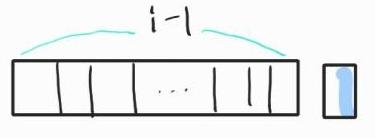

2. 왼쪽부터 i-2까지 길이가 덮개로 이미 채워져 있으면 1x2 덮개 2개를 넣는 경우, 혹은 2x2의 덮개 하나를 넣는 경우로 2가지 경우가 존재한다  
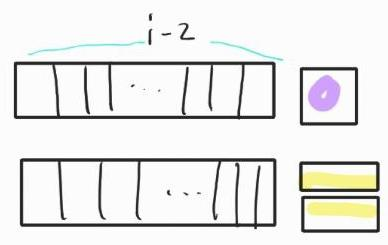   
왼쪽부터 i-2 미만의 길이에 대해서는 고려할 필요가 없다.  
사용할 수 있는 덮개의 형태가 최대 2x2의 직사각형 형태이기 때문이다. 
따라서 바닥을 채울 수 있는 형태는 위의 경우밖에 없다.    
왼쪽부터 i-2까지 길이가 덮개로 이미 채워져 있는 경우 덮개를 채우는 방법은 2가지 경우가 있다.  
이 두 방법은 서로 다른 것이므로, 결과적으로 $a_{i}는 a_{i-1} + a_{i-2} + a_{i-2}$가 된다.

In [247]:
n = int(input())

d = [0]*1001

d[1] = 1
d[2] = 3
for i in range(3,n+1):
    d[i] = (d[i-1]+d[i-2]*2)%796796
print(d[n])

 3


5
